# Введение в анализ и прогнозирование [временных рядов](https://ru.wikipedia.org/wiki/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D1%80%D1%8F%D0%B4)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [3]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print('Uploaded file "{name}" with length bytes'.format(name='gold_price_data.csv', length=len(uploaded['gold_price_data.csv'])))

Saving gold_price_data.csv to gold_price_data.csv
Uploaded file "gold_price_data.csv" with length bytes


In [4]:
# Параметр squeeze=True загружает набор данных в ивде объекта Series
data = pd.read_csv('gold_price_data.csv', header=0, index_col=0, parse_dates=True)
data = data.squeeze()

In [5]:
data.head()

Date
1970-01-01    35.2
1970-04-01    35.1
1970-07-01    35.4
1970-10-01    36.2
1971-01-01    37.4
Name: Value, dtype: float64

In [6]:
ts_data = pd.read_csv('gold_price_data.csv', header=0, index_col=0, parse_dates=True)

In [7]:
ts_data.head()

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


In [8]:
# Размер временного ряда
ts_data.shape

(10787, 1)

In [9]:
# Фильтр на январь 1970 года
ts_data['Value']['1970-01']

Date
1970-01-01    35.2
Name: Value, dtype: float64

In [10]:
# Фильтр на январь 1971 года
ts_data['Value']['1971-01']

Date
1971-01-01    37.4
Name: Value, dtype: float64

## Визуализация временных рядов


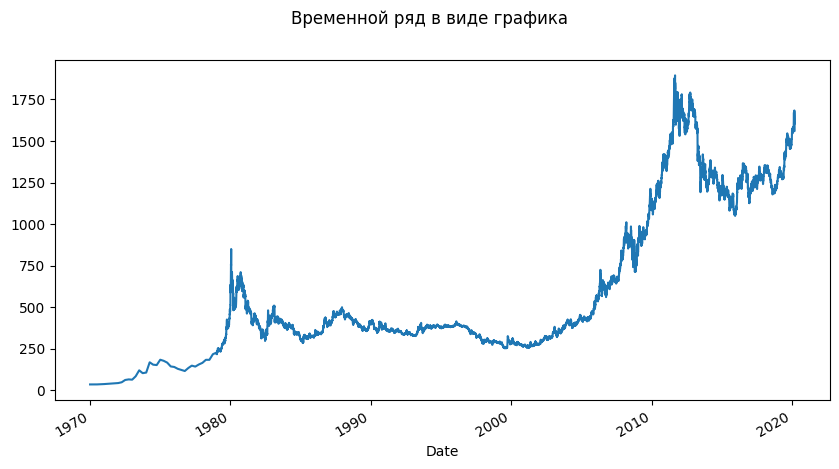

In [11]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
ts_data.plot(ax=ax, legend=False)
pyplot.show()

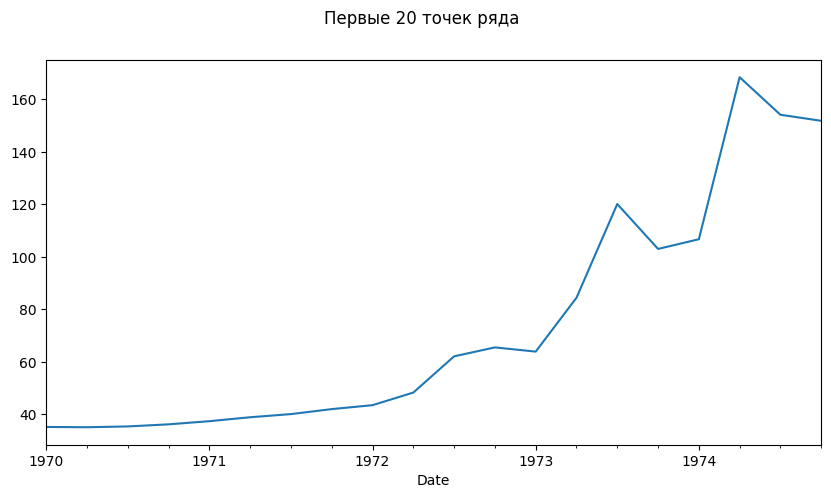

In [12]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 20 точек ряда')
ts_data[:20].plot(ax=ax, legend=False)
pyplot.show()

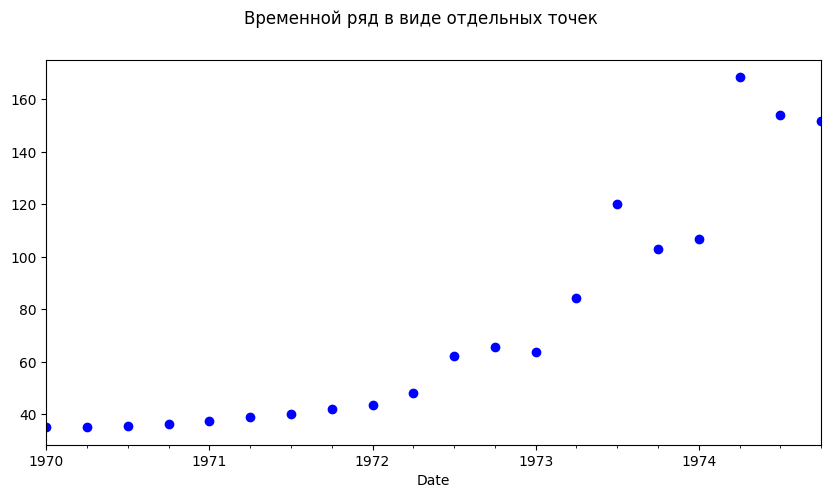

In [13]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде отдельных точек')
ts_data[:20].plot(ax=ax, legend=False, style='bo')
pyplot.show()

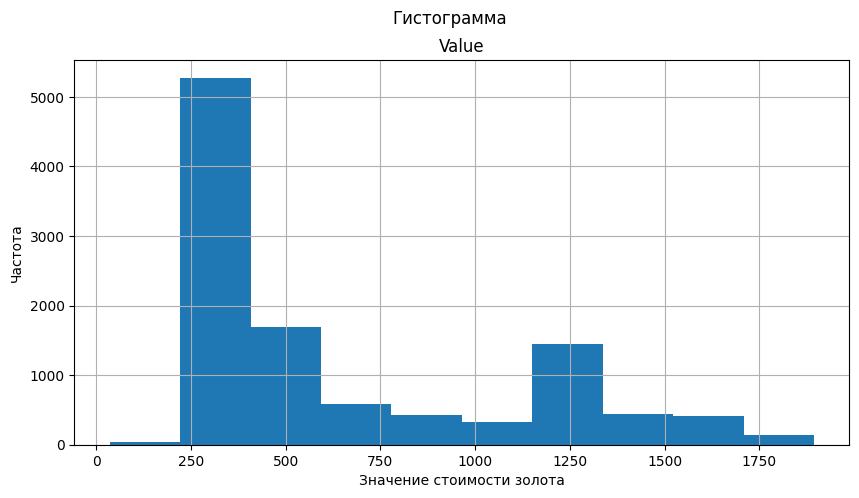

In [14]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
ts_data.hist(ax=ax, legend=False)

# Добавление подписей осей
ax.set_xlabel('Значение стоимости золота')
ax.set_ylabel('Частота')

pyplot.show()

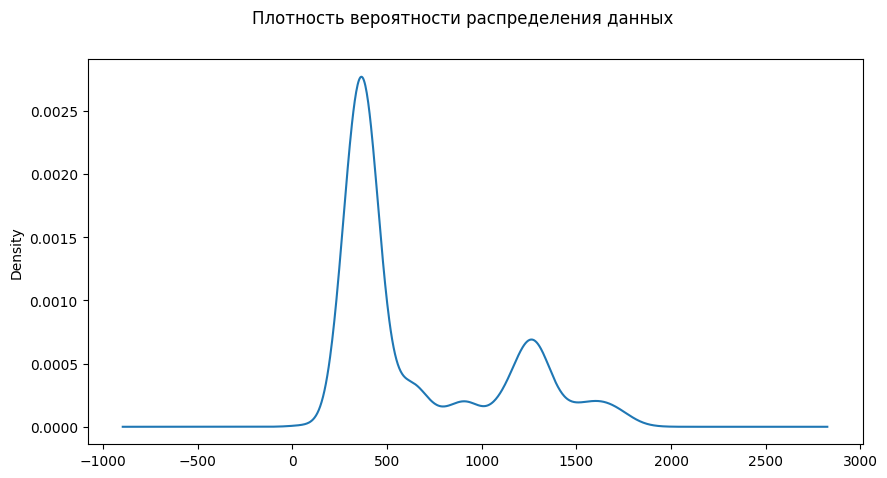

In [15]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
ts_data.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

### [Lag Plots](https://www.geeksforgeeks.org/lag-plots/)

- Диаграмма позволяет понять автокорреляцию в данных временного ряда. Может рассматриваться (хотя это весьма грубое сравнение) как аналог корреляционной матрицы для временного ряда.
- По оси абсцисс откладывается значение временного ряда.
- По оси ординат для каждой точки откладывается ее лаг порядка $i$, где $i$ - параметр, задаваемый пользователем.

Интерпретация графика:
- Если облако точек направлено из левого нижнего угла в правый верхний, то имеет место положительная автокорреляция.
- Если облако точек направлено из левого верхнего угла в правый нижний, то имеет место отрицательная автокорреляция.
- Любой из вариантов говорит о том, что автокорреляционные методы прогнозирования хорошо применимы к данному ряду.

Автокорреляционная диаграмма строит зависимость автокорреляции от лагов.

#### Пример применения Lag Plot и автокорреляционной диаграммы

Можно сделать вывод, что автокорреляция достаточно сильная.

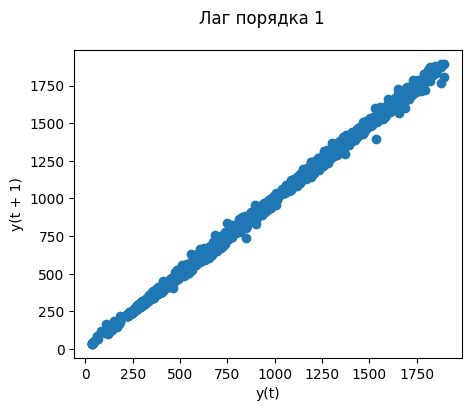

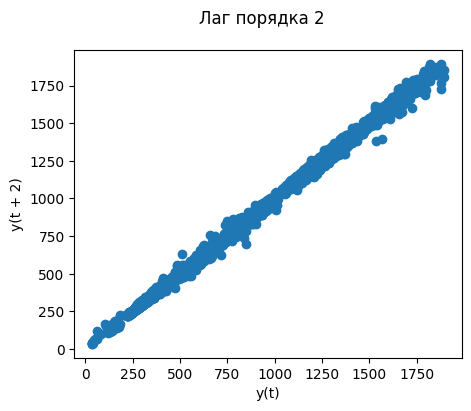

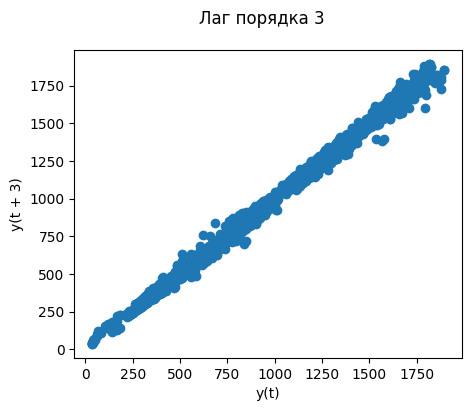

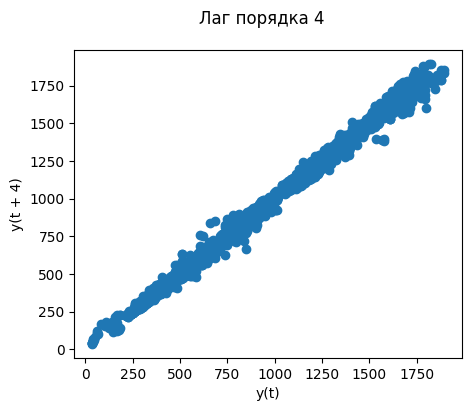

In [16]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(ts_data, lag=i, ax=ax)
    pyplot.show()

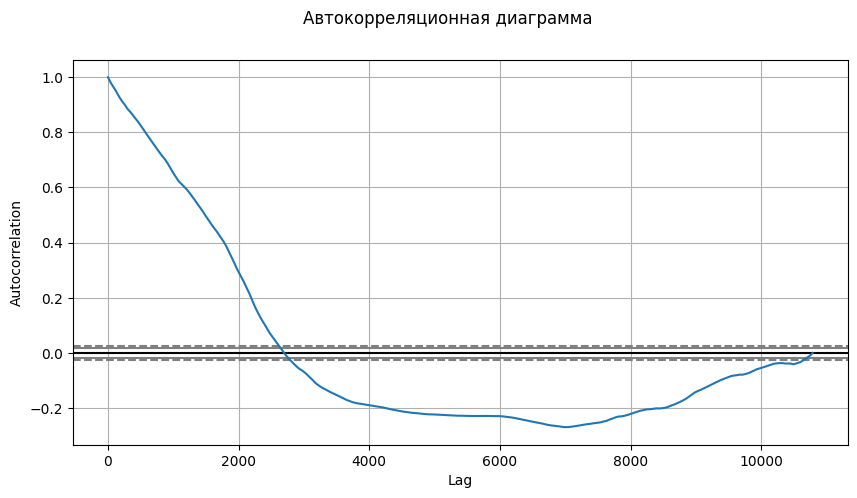

In [17]:
# По оси Y откладывается ковариация
# https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(ts_data, ax=ax)
pyplot.show()

### [Автокорреляционная функция](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

Показывает зависимость коэффициента корреляции от лага, то есть корреляцию между исходным временным рядом и временным рядом,сдвинутым на заданный лаг.

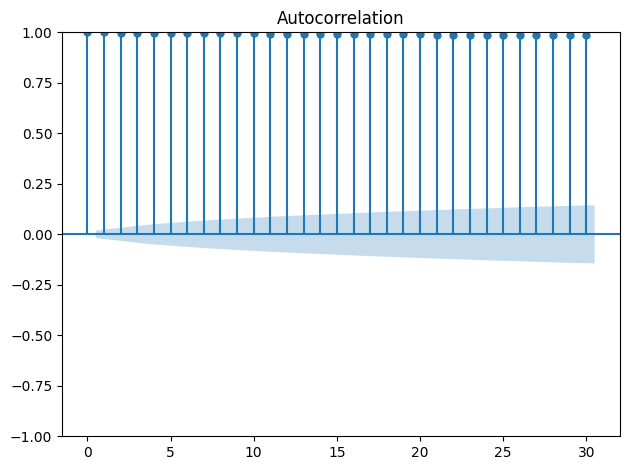

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_data, lags=30)
plt.tight_layout()

### [Частичная автокорреляционная функция](https://en.wikipedia.org/wiki/Partial_autocorrelation_function)

Находит корреляцию остатков, которые остается после удаления эффектов, объясняемых более ранними лагами.

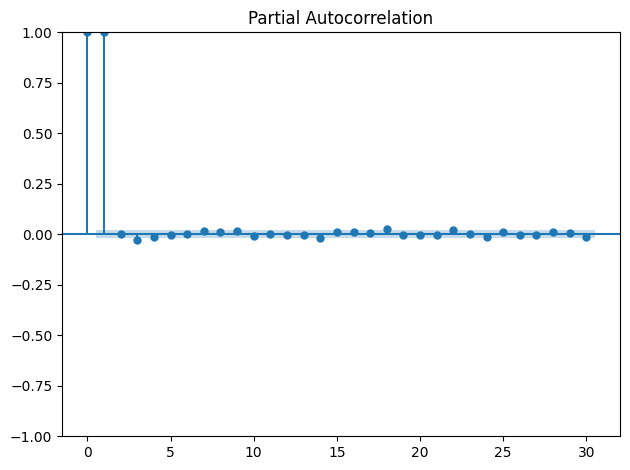

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts_data, lags=30)
plt.tight_layout()

## [Декомпозиция временного ряда](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) с помощью библиотеки statsmodels

In [20]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
from statsmodels.tsa.seasonal import seasonal_decompose
# Аддитивная модель
def plot_decompose(data=ts_data['Value'], model='add'):
    result_add = seasonal_decompose(data, model = 'add')
    fig = result_add.plot()
    fig.set_size_inches((10, 8))
    # Перерисовка
    fig.tight_layout()
    plt.show()

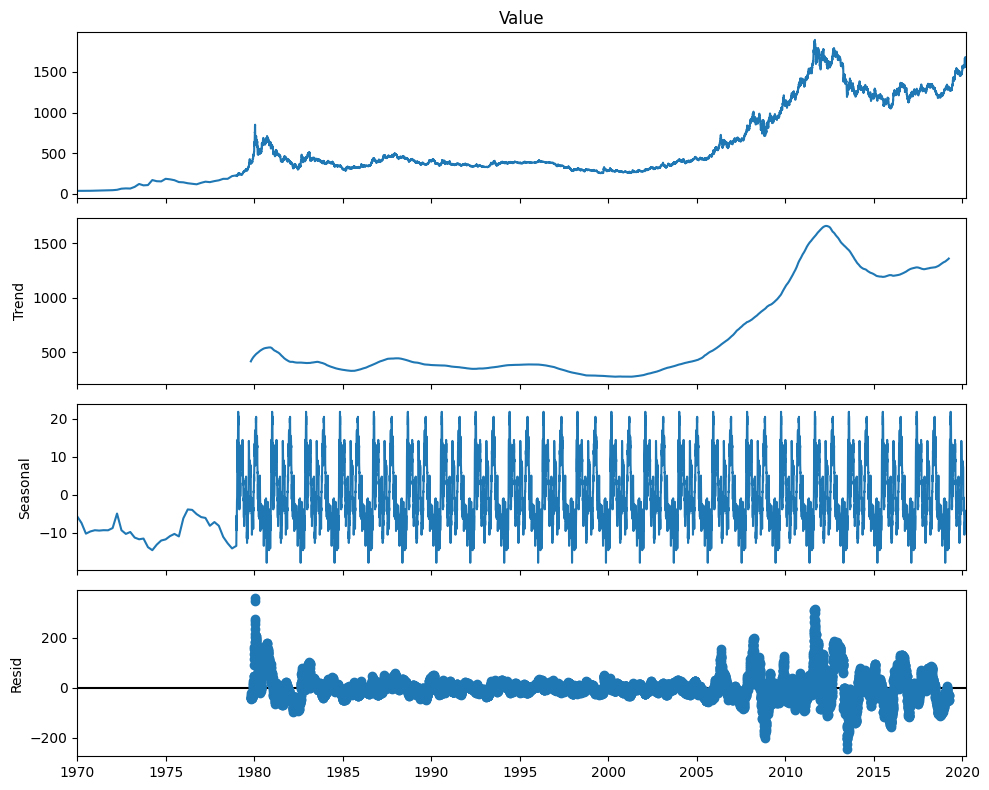

In [21]:
def plot_decompose(data=ts_data['Value'], model='add', period=500):
    result_add = seasonal_decompose(data, model=model, period=period)
    fig = result_add.plot()
    fig.set_size_inches((10, 8))
    fig.tight_layout()
    plt.show()

plot_decompose(data=ts_data['Value'], model='add', period=500)

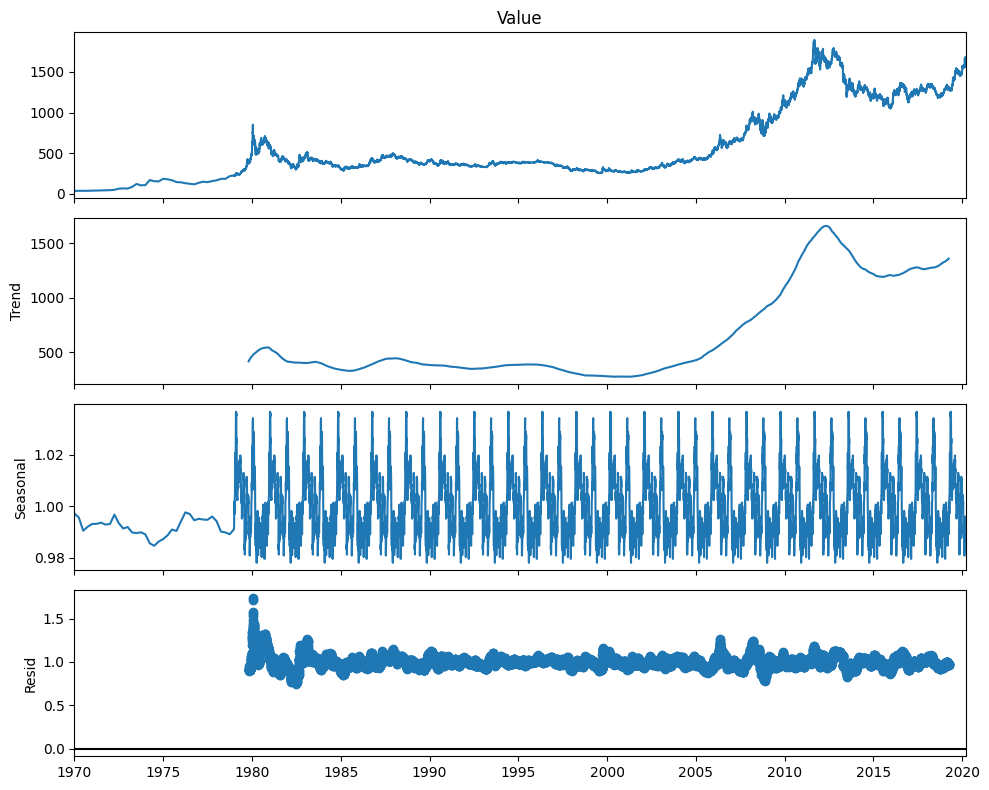

In [22]:
plot_decompose(data=ts_data['Value'], model='mul')

## [Скользящая средняя](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B0%D1%8F_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D1%8F%D1%8F)

- Показывает среднее значение ряда, но не является алгоритмом предсказания.

In [23]:
ts_data2 = ts_data[::10].copy()

In [24]:
# Простое скользящее среднее (SMA)
ts_data2['SMA_10'] = ts_data2['Value'].rolling(10, min_periods=1).mean()
ts_data2['SMA_20'] = ts_data2['Value'].rolling(20, min_periods=1).mean()

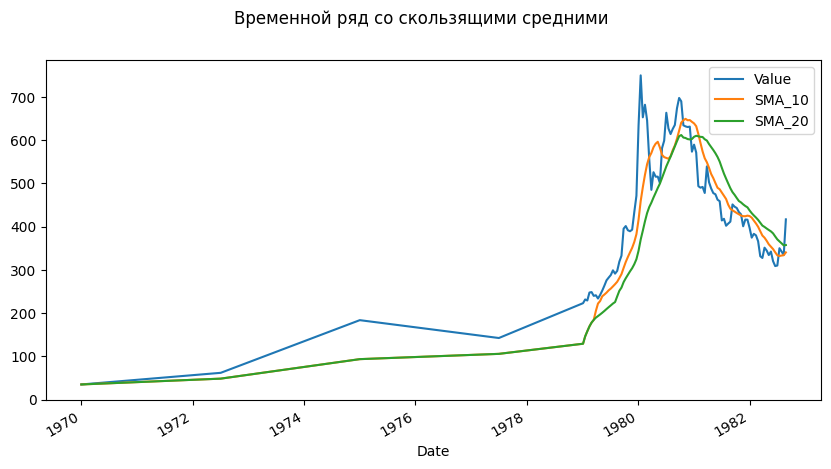

In [25]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
ts_data2[:100].plot(ax=ax, legend=True)
pyplot.show()

## Прогнозирование временного ряда авторегрессионными методами

- Методы прогнозирования
    - [Модель ARMA](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%E2%80%94_%D1%81%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B5%D0%B3%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE)
    - [Модель ARIMA](https://ru.wikipedia.org/wiki/ARIMA)
    - [Модель Хольта-Винтера](https://www.helenkapatsa.ru/modiel-kholta-vintiersa/)

- Реализация методов прогнозирования
    - [Статья с примерами прогнозирования на Python](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)
    - [Подбор гиперпараметров для модели ARIMA](https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/)

In [26]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
# Целочисленная метка шкалы времени
xnum = list(range(ts_data2.shape[0]))

# Разделение выборки на обучающую и тестовую
Y = ts_data2['Value'].values
train_size = int(len(Y) * 0.7)

xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]

history_arima = [x for x in train]
history_es = [x for x in train]

In [28]:
# Параметры модели (p,d,q)
arima_order = (6,1,0)

# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [29]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
  model_es = ExponentialSmoothing(history_es)
  model_es_fit = model_es.fit()
  yhat_es = model_es_fit.forecast()[0]
  predictions_es.append(yhat_es)
  history_es.append(test[t])
# Вычисление метрики RMSE
error_es = mean_squared_error(test, predictions_es, squared=False)

In [30]:
# Ошибка прогноза
print(np.mean(Y), error_arima, error_es)
# np.mean(Y), error_es

653.2091288229842 40.85960985783761 40.25335661559027


In [31]:
# Записываем предсказания в DataFrame
ts_data2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
ts_data2['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

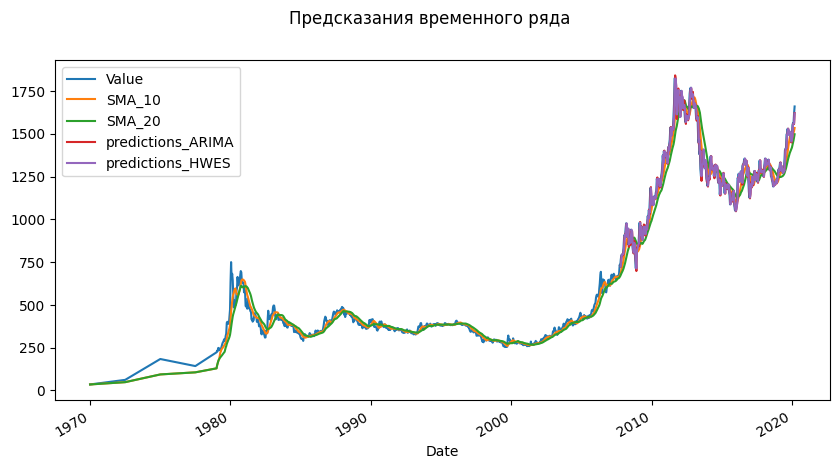

In [32]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
ts_data2.plot(ax=ax, legend=True)
pyplot.show()

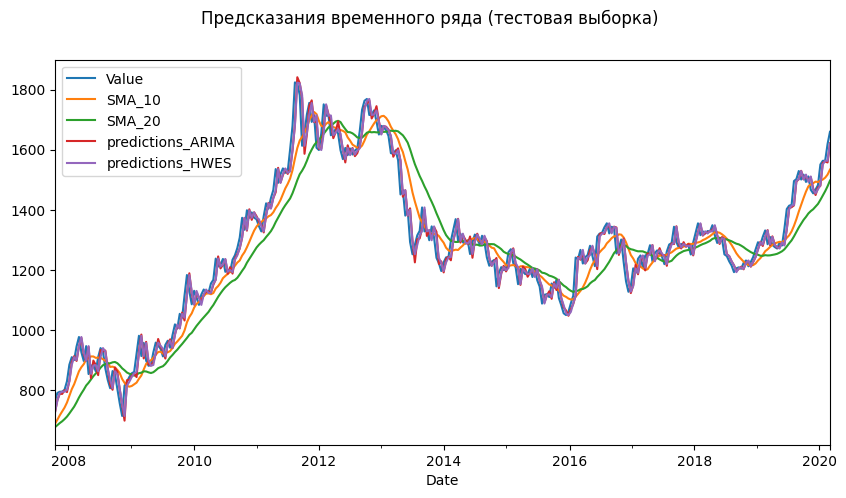

In [34]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_data2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

Вывод. Предсказания ARIMA и HWES близки к скользящему среднему.

## Прогнозирование временного ряда методом [символьной регресии](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BC%D0%B2%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

Для реализации используется библиотека [gplearn.](https://gplearn.readthedocs.io/en/stable/)

[Пример использования gplearn для временных рядов.](https://towardsdatascience.com/unit-4-genetic-programming-d80cd12c454f)

In [36]:
!pip install gplearn

In [37]:
from gplearn.genetic import SymbolicRegressor

In [38]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [39]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      2.62513e+66       39          53550.6              N/A      4.84m
   1   138.74      2.10795e+14       42          51076.7              N/A     56.59s
   2    62.41      5.46707e+12       36          50915.8              N/A     35.91s
   3    41.09      5.94566e+28       47          35777.5              N/A     30.96s
   4    42.22      8.36084e+06       46            35745              N/A     29.82s
   5    42.77      6.99666e+11       51          19825.3              N/A     44.22s
   6    48.65      2.07246e+08       65          10230.5              N/A      1.05m
   7    54.78      3.89239e+08       67          10217.7              N/A      1.10m
   8    64.32      9.07633e+08       31          9881.56              N/A  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=70, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [ ]:
# print(est_gp._program)

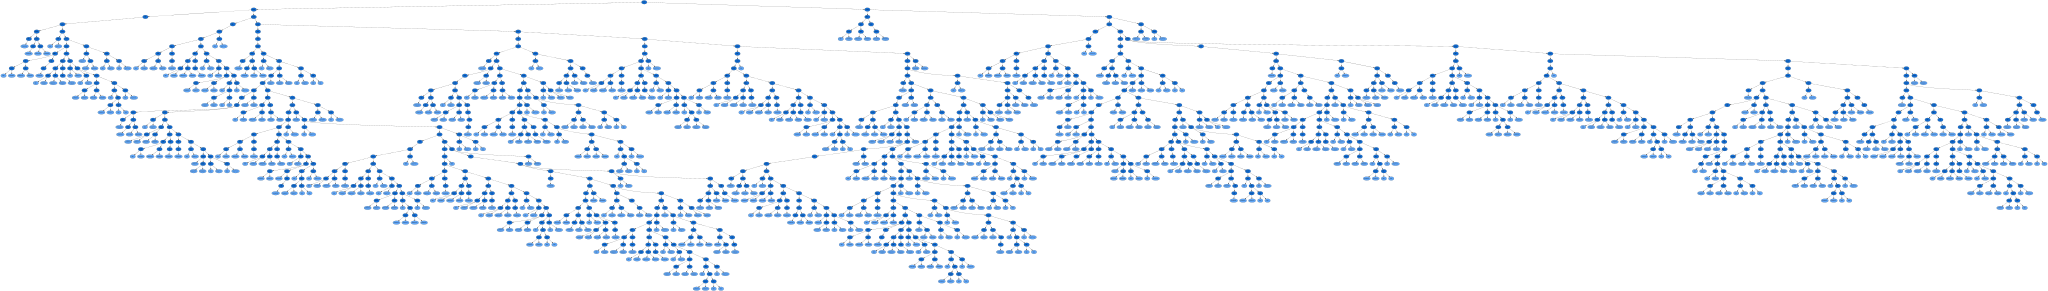

In [49]:
import graphviz
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [50]:
# Предсказания
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([398.05769454, 398.00856085, 398.01610128, 397.88770851,
       397.90814846, 397.83534953, 397.71464552, 397.71719837,
       397.50651388, 397.50867262])

In [51]:
# Записываем предсказания в DataFrame
ts_data2['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

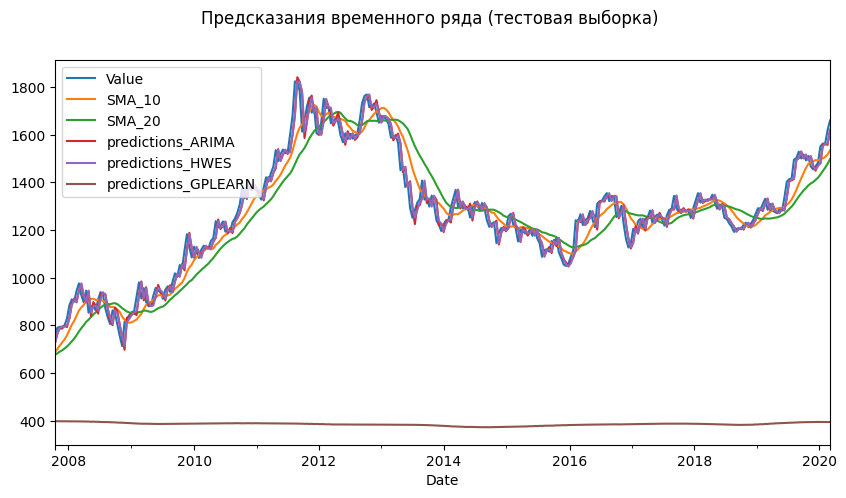

In [52]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_data2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

## МГУА

In [55]:
!pip install gmdh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.3/875.3 kB 5.2 MB/s eta 0:00:00


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def print_metrics(y_test, y_pred, squared=False):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    crit_name = "MSE" if squared else "RMSE"
    print(f"{crit_name}: {mean_squared_error(y_test, y_pred, squared=squared)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
def show_metric_for(y_pred):
  print_metrics(scaler.inverse_transform(test.reshape(-1, 1)), y_pred)

import gmdh
combi_model = gmdh.Combi()
combi_model.fit(xnum_train, train, verbose=1, n_jobs=-1, test_size=0.7, limit=0,
                       criterion=gmdh.Criterion(gmdh.CriterionType.REGULARITY))

y_pred_combi = combi_model.predict(xnum_test)

print_metrics(test, y_pred_combi)

# Добавление предсказаний в исходный DataFrame
ts_data2['pred_Combi'] = (train_size * [np.NAN]) + list(y_pred_combi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LEVEL 1  [=========================] 100% :00s] (1 combinations) error=1.125e+07
R^2: -21.42340904950595
RMSE: 1129.0942566165138
MAE: 1101.2782165463184


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


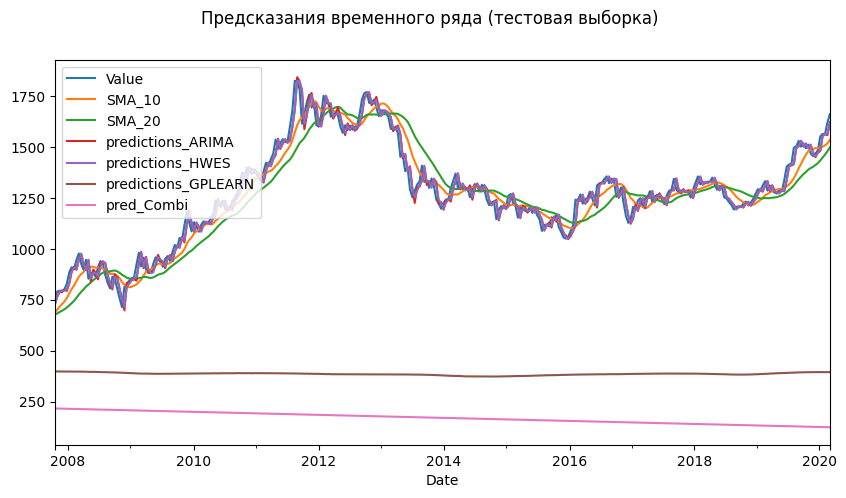

In [81]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_data2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

In [84]:
multi_model = gmdh.Multi()
multi_model.fit(xnum_train, train, verbose=1, n_jobs=-1, test_size=0.24, limit=0, k_best=5,
                       criterion=gmdh.Criterion(gmdh.CriterionType.REGULARITY))

y_pred_multi = multi_model.predict(xnum_test)
print_metrics(test, y_pred_multi)
# Добавление предсказаний в исходный DataFrame
ts_data2['pred_Multi'] = (train_size * [np.NAN]) + list(y_pred_multi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LEVEL 1  [=========================] 100% :00s] (1 combinations) error=6.92233e+06
R^2: -18.607934955822753
RMSE: 1055.8331838646666
MAE: 1026.7929926334896


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


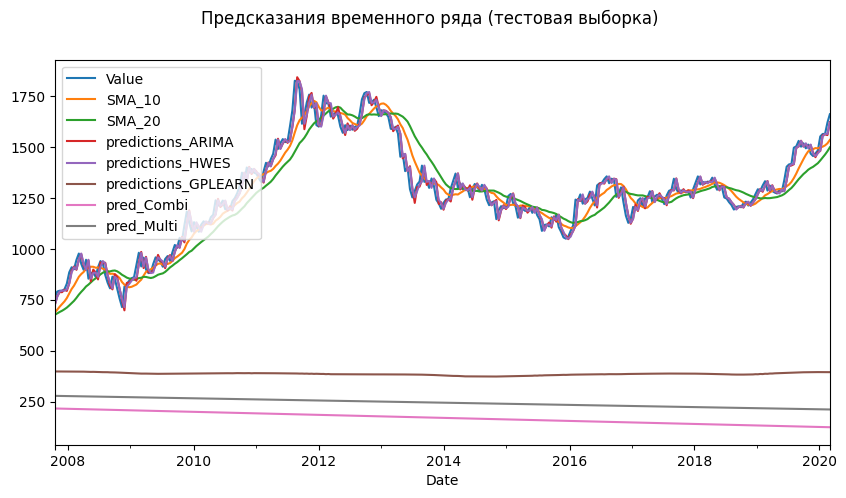

In [85]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_data2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

## MIA

In [ ]:
mia_model = gmdh.Mia()
mia_model.fit(xnum_train, train, verbose=1, n_jobs=-1, test_size=0.45, limit=0, k_best=9,
                     criterion=gmdh.Criterion(gmdh.CriterionType.SYM_REGULARITY),
                     polynomial_type=gmdh.PolynomialType.LINEAR)
y_pred_mia = mia_model.predict(xnum_test)
print_metrics(test, y_pred_mia)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
